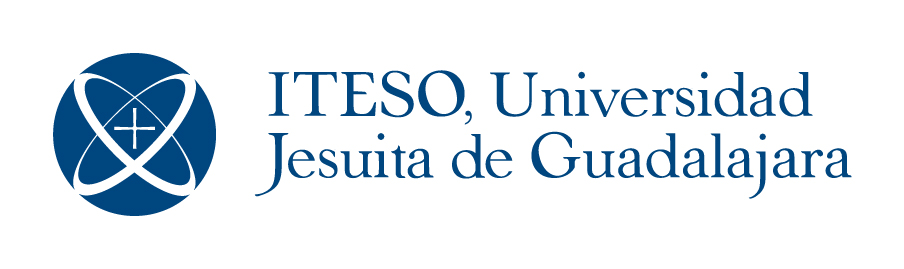

# Integración de cuerpos tridimensionales para obtener su volumen

Matias Medrano Ascencio

745136

matias.medrano@iteso.mx

Daniela Serrano Barba

745449

daniela.serrano@iteso.mx

María Fernanda Tirado Zamudio

744529

maria.tirado@iteso.mx

Lunes 23 de octubre del 2023

## Objetivos

### Objetivo general

- Utilizar la integración Montecarlo para obtener el volumen de un cuerpo tridimensional definido por una función.

### Objetivos específicos

- Definición de funciones que trazen un cuerpo de un elemento cuyo volumen se desea conocer.

- Definición de límites (bordes).

- Integrar por medio de la función Montecarlo con diferentes cantidades de términos utilizados en la aproximación.

- Representar en una tabla los volumenes aproximados según la cantidad de términos utilizados.

## Planteamiento del problema

Se desea conocer el volumen de ciertos elementos tridimensionales, los cuales se definen con ciertas funciones. Se utilizan las variables "x", "y" y "z" para definir el espacio tridimensional, mientras que el objetivo de las funciones es determinar si cierta combinación de las variables (coordenadas) se encuentra dentro del volumen por medio de desigualdades. Es decir, funcionan como restricciones que nos permiten conocer si cierto punto se encuentra dentro o fuera del elemento.

Se definen las funciones a utilizar, las cuales son desigualdades generales según el cuerpo:
- Esfera ( $ x^2 + y^2 + z^2 \leq a $)
- Prisma rectangular ($ a \leq x \leq b $), ($ a \leq y \leq c $), ($ a \leq z \leq d $)
- Cuerpo irregular ($ x^2 + y^2 \leq z $), ($ x^2 + y^2 \geq a $), ($ z \geq b $), ($ z \leq c $) (Se trata de un cono con un hueco por dentro)

Estas restricciones cuentan con parámetros "a", "b", "c" y "d", los cuales pueden ser asignados para definir el tamaño de los elementos. En este caso se asignaran los parámetros con los siguientes valores:

**Esfera**

- $ a = 9 $

**Prisma rectangular**

- $ a = 0 $
- $ b = 15 $
- $ c = 23 $
- $ d = 31 $

**Cuerpo irregular**
- $ a = 3 $
- $ b = 0 $
- $ c = 7 $

## Solución

Debido a que se trata de desiagualdades, utilizamos la segunda función de Montecarlo para encontrar el volumen de los elementos.

Igualmente, debemos alterar la función, ya que se debe agregar una tercera variable "z" que pueda recibir los datos ingresados y dados por las diferentes funciones. Otra alteración hecha a la función es incluir el valor de "z" en la definición de la B, e incluir el factor ($ zB - zA $) en la definición del volumen de la región. 

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def f1(x, y, z):
    return x**2 + y**2 + z**2 <= 9

def f2(x, y, z):
    return (0 <= x) & (x <= 15) & (0 <= y) & (y <= 23) & (0 <= z) & (z <= 31)

def f3(x, y, z):
    return (x**2 + y**2 <= z) & (x**2 + y**2 >= 3) & (z >= 0) & (z <= 7)

In [35]:
def montecarlo(region, xA, xB, yA, yB, zA, zB, N):
    x = np.random.uniform(xA, xB, N)
    y = np.random.uniform(yA, yB, N)
    z = np.random.uniform(zA, zB, N)
    B = region(x, y, z)
    AR = (xB - xA) * (yB - yA) * (zB - zA)
    return np.mean(B) * AR

In [36]:
N = np.logspace(1, 6, 6)

Para poder definir los límites dentro de los cuales se integrará en cada eje, graficaremos para acotar la región lo más posible. Se deben realizar cambios para poder graficar en tres dimensiones.
Es importante aclarar que como se trata de un volumen, solamente se pueden observar los bordes del cuerpo dentro de la región, por lo que los límites se deben escoger en valores que permitan observar el cuerpo de color amarillo dentro de la gráfica por medio de prueba y error.

### Función 1

Podemos usar la función 1 como ejemplo de este proceso.

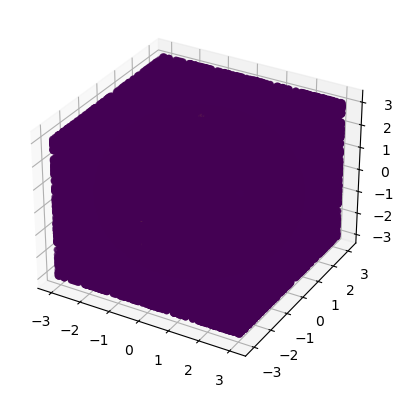

In [5]:
x = np.random.uniform(-3.1, 3.1, 100)
y = np.random.uniform(-3.1, 3.1, 100)
z = np.random.uniform(-3.1, 3.1, 100)

X, Y, Z = np.meshgrid(x, y, z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=f1(X, Y, Z))
plt.show()

En este caso debemos de acotar los límites más.

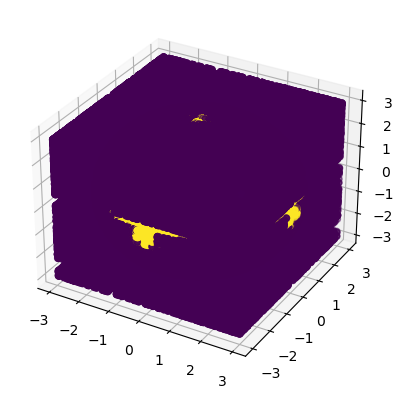

In [25]:
x = np.random.uniform(-3, 3, 100)
y = np.random.uniform(-3, 3, 100)
z = np.random.uniform(-3, 3, 100)

X, Y, Z = np.meshgrid(x, y, z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=f1(X, Y, Z))
plt.show()

Ahora se puede ver el cuerpo de color amarillo. 

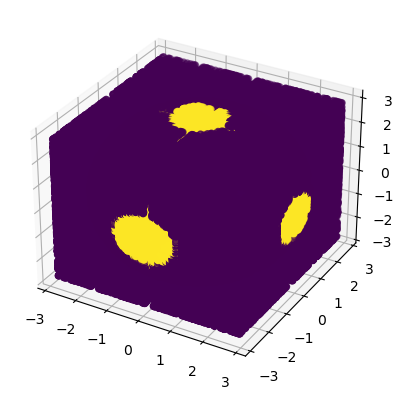

In [26]:
x = np.random.uniform(-2.9, 2.9, 100)
y = np.random.uniform(-2.9, 2.9, 100)
z = np.random.uniform(-2.9, 2.9, 100)

X, Y, Z = np.meshgrid(x, y, z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=f1(X, Y, Z))
plt.show()

Si trataramos con límites más pequeños, se recorta más la figura, por lo que conviene mas utilizar los límites anteriores. Se sigue este procedimiento con las siguientes funciones.

### Función 2

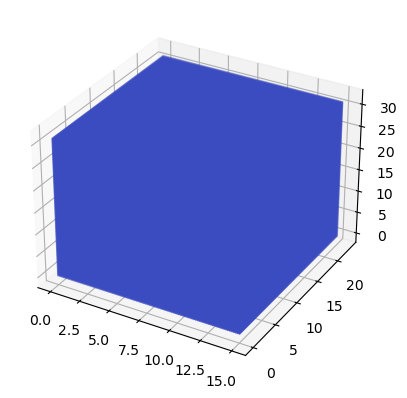

In [18]:
x = np.linspace(0, 15, 100)
y = np.linspace(0, 23, 100)
z = np.linspace(0, 31, 100)

X, Y, Z = np.meshgrid(x, y, z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=f2(X, Y, Z), s=1, cmap='coolwarm')
plt.show()

Como se trata de un prisma rectangular, el cuerpo abarca la región completa.

### Función 3

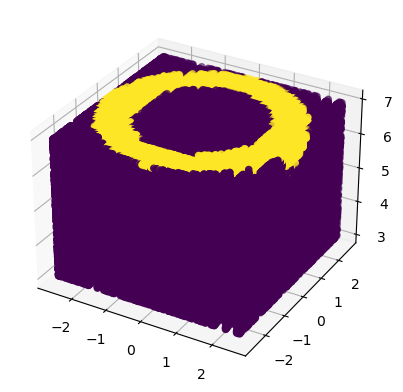

In [8]:
x = np.random.uniform(-2.65, 2.65, 100)
y = np.random.uniform(-2.65, 2.65, 100)
z = np.random.uniform(3, 7, 100)

X, Y, Z = np.meshgrid(x, y, z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=f3(X, Y, Z))
plt.show()

## Visualización de la solución del problema

Se utilizará una sola tabla que represente los resultados obtenidos de las tres funciones.

In [37]:
table = pd.DataFrame(columns=["Volumen 1", "Volumen 2", "Volumen 3"], index = N)

In [38]:
np.random.seed(30)

for i in N:
    volumen1 = montecarlo(f1, -3, 3, -3, 3, -3, 3, int(i))
    table.loc[i, "Volumen 1"] = volumen1
    volumen2 = montecarlo(f2, 0, 15, 0, 23, 0, 31, int(i))
    table.loc[i, "Volumen 2"] = volumen2
    volumen3 = montecarlo(f3, -2.65, 2.65, -2.65, 2.65, 3, 7, int(i))
    table.loc[i, "Volumen 3"] = volumen3

In [39]:
table

,Volumen 1,Volumen 2,Volumen 3
10.0,108.0,10695.0,33.708
100.0,110.16,10695.0,24.7192
1000.0,110.808,10695.0,23.5956
10000.0,113.2488,10695.0,24.876504
100000.0,112.99608,10695.0,25.312461
1000000.0,113.14944,10695.0,25.159202


La tabla anterior concentra los resultados obtenidos a través de la integración Montecarlo según la figura y la cantidad de términos utilizados. Entre más términos se hayan utilizado, más correcta será la aproximación.

## Conclusiones

Al ajustar la función Montecarlo para recibir y tratar con funciones tridimensionales, es posible aumentar el alcance real y contar con más aplicaciones, especialmente cuando se trata con cuerpos irregulares y difíciles de aproximar por otros métodos, como por ejemplo la tercera figura, y así poder conocer volumenes de elementos estructurales. Se observa que entre más términos se utilicen, el volumen tiende a cierto límite, el cual es el volumen real, y debido a que los dos primeros cuerpos utilizados cuentan con fórmulas sencillas podemos conocer el error de cada aproximación. Por ejemplo, la primera función se trata de una esfera con un radio de 3 unidades cuyo volumen se define por la fórmula $ V = \frac{4}{3} \pi r^2 $, mientras que la segunda función es un prisma rectangular cuyos lados miden 15, 23 y 31 unidades. Tomando en cuenta las aproximaciones con la mayor cantidad de términos podemos encontar en el volumen 1 un error de 0.0521 unidades cúbicas, y en el segundo volumen encontramos un error de 0 unidades cúbicas. 

Igualmente es importante tener cuidado en la consideración de los límites del volumen, para evitar recortar secciones de la figura y reducir la aproximación del volumen, siendo este el objetivo más difícil de lograr. Al momento de definir las funciones se debe tener cuidado ya que estas están compuestas de diversas restricciones y es posible generar errores si se definen erróneamente.

## Referencias

- Indeed. (2022). *How to Calculate the Volume of 3D Shapes (With Examples)*. 

https://ca.indeed.com/career-advice/career-development/how-to-calculate-volume
- *Make 3D plot interactive in Jupyter Notebook (Python & Matplotlib)* (2021). tutorialspoint.

https://www.tutorialspoint.com/make-3d-plot-interactive-in-jupyter-notebook-python-and-matplotlib
- *What are Irregular shapes?* (s.f.). Twinkl.

https://www.twinkl.com.mx/teaching-wiki/irregular-shapes